In [2]:
# packages to import
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

# download puntuation package
nltk.download('punkt')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# from data folder read the plot summaries into a pandas dataframe
plot_columns = ["Wikipedia Movie ID", "Plot Summary"]
movie_columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie Name", "Movie release data", "Revenue", "Runtime", "Languages", "Countries", "Genres"]

plot_summaries = pd.read_csv("data/plot_summaries.txt" , sep="\t", header=None, names=plot_columns)
movie_metadata = pd.read_csv("data/movie.metadata.tsv", sep = "\t", header=None, names=movie_columns)

In [19]:
# count the number of lines
plot_summaries["Number Of Sentances"] = plot_summaries["Plot Summary"].apply(lambda sentance: len(sent_tokenize(sentance)))

Text(0.5, 1.0, 'Number of Sentances, histogram')

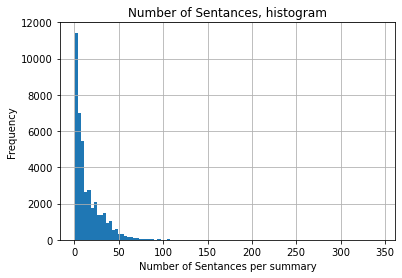

In [5]:
# display the distribution of the number of sentances
plot_summaries["Number Of Sentances"].hist(bins=100)
plt.xlabel('Number of Sentances per summary')
plt.ylabel('Frequency')
plt.title('Number of Sentances, histogram')

In [11]:
movie_metadata.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Movie release data,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [15]:
plot_summaries.head()

,Wikipedia Movie ID,Plot Summary,Number Of Sentances
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",1
1,31186339,The nation of Panem consists of a wealthy Capi...,52
2,20663735,Poovalli Induchoodan is sentenced for six yea...,26
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",49
4,595909,Seventh-day Adventist Church pastor Michael Ch...,15


In [23]:
merged = pd.merge(movie_metadata, plot_summaries, how = "inner", on=['Wikipedia Movie ID'])
merged_and_grouped_by_genres = merged.groupby(['Genres'])

merged_and_grouped_by_genres.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Movie release data,Revenue,Runtime,Languages,Countries,Genres,Plot Summary,Number Of Sentances
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",15
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,36
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",24
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns...",7
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a...",9
...,...,...,...,...,...,...,...,...,...,...,...
42194,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",Havoc is wrought on the inhabitants of a small...,9
42195,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",Jennifer Haines is an up-and-coming Chicago a...,37
42197,15394941,/m/03m6zh4,Gopi Kishan,1994-12-02,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/02kdv5l"": ""Action""...",Kishan killed a man in his childhood when the...,55
42199,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",{{plot}} The film opens with a Great Western e...,114
